# **Homework 5**
Create a copy of the notebook to start answering the questions. Name your notebook in the format HW5_lastname_firstname.ipynb to facilitate the grading process.

Answer all the questions, test your code to ensure there are no errors and the results are as expected. Once you have answered all the questions, save the final copy, then go to File-> click on Download.ipynb. Once the local copy has been downloaded, submit your file on Blackboard under the corresponding assignment section. Also provide us a link to your notebook during submission. 

**NOTE:** Please give the TAs the permission to access your notebooks through the links you have provided during submission.

The due date of this homework is 04/02/2021 (Friday).

Please ensure you follow all the steps mentioned in the homework.

You can submit your solutions any number of times until the deadline.

The datasets used in this homework can be found in the google drive link below - 

https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

Follow the necessary steps to import data to test your code. You can use any method to read your data in the notebook. We will not be grading the methods you use. We will only grade the code from the point where you read the dataset into a pandas dataframe - (pd.read_csv('file_name')) 

The dataset you will analyze in this HW is the RMS Titanic. https://en.wikipedia.org/wiki/RMS_Titanic.

Your goal is to classify survivability based on the various factors of the passengers. 

For our problem, we will choose the factors listed below:

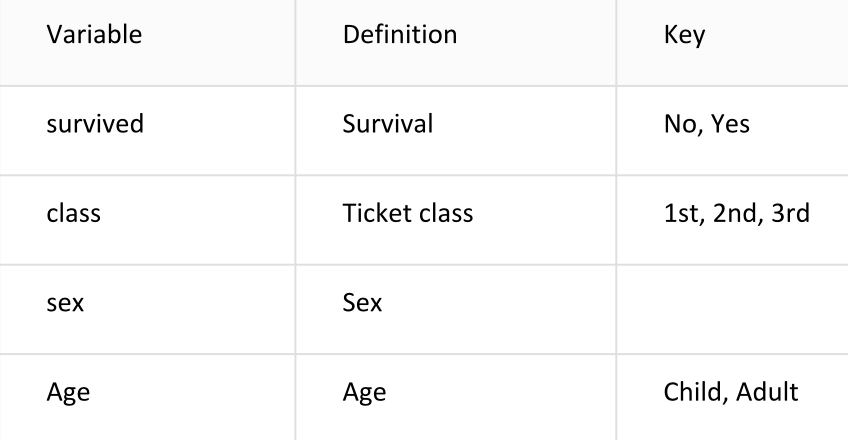

The dataset we will be using can be found in the shared dataset folder. The file name is Titanic.csv

1. Read the dataset into a dataframe. Display the first 5 rows of the dataframe. (2)
2. Explore the dataset and determine what is the target variable. (2)
3. Drop factor(s) that are not likely to be relevant for logistic regression. (2)
4. Make sure there are no missing values. Handle missing values if any. (2)
5. Plot count plots of each of the remaining factors (including the target variable). (3)
6. Convert all categorical feature variables into dummy variables. (3)
7. Partition the data into train and test sets (70/30). Use random_state = 2020. (2)
8. Fit the training data to a logistic regression model. (2)
9. Predict the outcomes for the test set. (2)
10. Display the accuracy of your predictions for survivability. (2)
11. Display the confusion matrix along with the labels (Yes, No).
Hint: You may want to use from sklearn.metrics import plot_confusion_matrix (2)
12. Now, display the predicted value of the survivability of a male adult passenger traveling in 3 rd class. (3)
13. Next, display the predicted probability of the survivability of a male adult passenger traveling in 3 rd class. (3)

In [1]:
# import all necessary libraries here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Type solution here
# 1. Read the dataset into a dataframe. Display the first 5 rows of the dataframe
pd.set_option('display.max_columns', None)
df = pd.read_csv('Titanic (1).csv')
df.head()

,Passenger,Class,Sex,Age,Survived
0,1,3rd,Male,Child,No
1,2,3rd,Male,Child,No
2,3,3rd,Male,Child,No
3,4,3rd,Male,Child,No
4,5,3rd,Male,Child,No


In [3]:
# 2. Explore the dataset and determine what is the target variable
df.info()
df.describe()
print("Unique Passenger values: ")
df['Passenger'].unique()
print("Unique Class values: ")
print(df['Class'].unique())
print("Unique Sex values: ")
print(df['Sex'].unique())
print("Unique Age values: ")
print(df['Age'].unique())
print("Unique Survived values: ")
print(df['Survived'].unique())
# "Survived" is target variable because we want to use other variables to predict survival
print("Survived is target variable!")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Passenger  2201 non-null   int64 
 1   Class      2201 non-null   object
 2   Sex        2201 non-null   object
 3   Age        2201 non-null   object
 4   Survived   2201 non-null   object
dtypes: int64(1), object(4)
memory usage: 86.1+ KB
Unique Passenger values: 
Unique Class values: 
['3rd' '1st' '2nd' 'Crew']
Unique Sex values: 
['Male' 'Female']
Unique Age values: 
['Child' 'Adult']
Unique Survived values: 
['No' 'Yes']
Survived is target variable!


In [4]:
# 3. Drop factor(s) that are not likely to be relevant for logistic regression
# drop Passenger
df.drop("Passenger", axis=1, inplace=True)

df

,Class,Sex,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


In [5]:
# 4. Make sure there are no missing values. Handle missing values if any
# print indexes where values are null
print(np.where(pd.isnull(df)))
# there are no missing values to be handled
print("No missing values to be handled!")

(array([], dtype=int64), array([], dtype=int64))
No missing values to be handled!


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


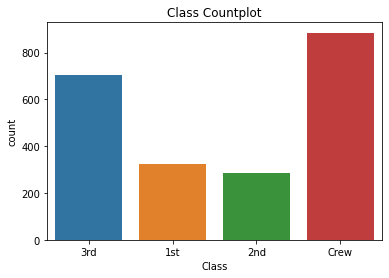

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


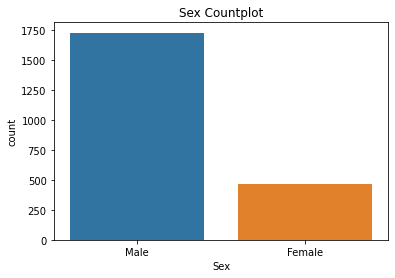

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


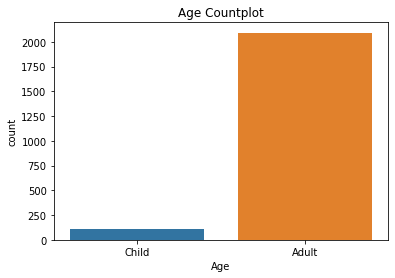

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


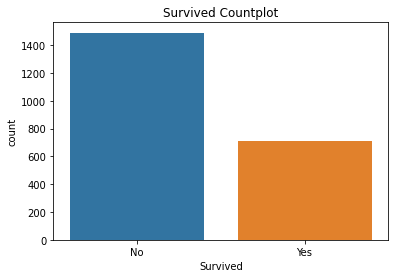

In [6]:
# 5. Plot count plots of each of the remaining factors (including the target variable)
import seaborn as sb
sb.countplot('Class', data=df)
plt.title("Class Countplot")
plt.show()

sb.countplot('Sex', data=df)
plt.title("Sex Countplot")
plt.show()

sb.countplot('Age', data=df)
plt.title("Age Countplot")
plt.show()

sb.countplot('Survived', data=df)
plt.title("Survived Countplot")
plt.show()

In [8]:
# 6. Convert all categorical feature variables into dummy variables
df_updated = df.replace({'Class': {'1st': 1, '2nd': 2, '3rd': 3, 'Crew': 0},
                         'Sex': {'Male': 0, 'Female': 1},
                         'Age': {'Child': 0, 'Adult': 1},
                         'Survived': {'No': 0, 'Yes': 1}})
df_updated

,Class,Sex,Age,Survived
0,3,0,0,0
1,3,0,0,0
2,3,0,0,0
3,3,0,0,0
4,3,0,0,0
...,...,...,...,...
2196,0,1,1,1
2197,0,1,1,1
2198,0,1,1,1
2199,0,1,1,1


In [9]:
# 7. Partition the data into train and test sets (70/30). Use random_state = 2020
from sklearn.model_selection import train_test_split
X = df_updated.loc[:, ['Class', 'Sex', 'Age']]
y = df_updated['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2020, stratify=y)

In [10]:
# 8. Fit the training data to a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# 9. Predict the outcomes for the test set
prediction = model.predict(X_test)
print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1
 0 0 1 0 0 1 0 1 1 0 0 0 

In [12]:
# 10. Display the accuracy of your predictions for survivability
from sklearn import metrics
print(metrics.accuracy_score(y_test, prediction))

0.794251134644478


[[413  34]
 [102 112]]


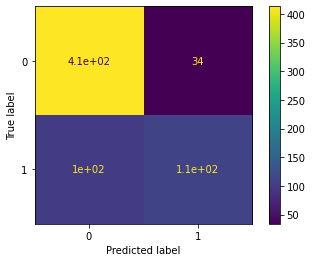

In [13]:
# 11. Display the confusion matrix along with the labels (Yes, No). 
# Hint: You may want to use from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# labels = ['Yes', 'No']
matrix = metrics.confusion_matrix(y_test, prediction)
# matrix = confusion_matrix(y_test, prediction,labels)
print(matrix)
metrics.plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [14]:
# 12. Now, display the predicted value of the survivability of a male adult passenger traveling in 3 rd class
print(model.predict([[3,0,1]]))
print("0 means will not survive")

[0]
0 means will not survive


In [15]:
# 13. Next, display the predicted probability of the survivability of a male adult passenger traveling in 3rd class
print(model.predict_proba([[3,0,1]]))
prob = model.predict_proba([[3,0,1]])
print(model.classes_)
# this is the predicted probability of the survivability of a male adult passenger traveling in 3rd class
print(prob[0,1])

[[0.85987725 0.14012275]]
[0 1]
0.14012275241905275
